# 第一个深度神经网络
## 引入

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

## 数据

In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

## 网络结构

In [3]:
class MyModel(Model):
    def __init__(self, input_shape, num_classes, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.flatten = Flatten(input_shape=input_shape)
        self.dense1 = Dense(200, activation="relu")
        self.dense2 = Dense(150, activation="relu")
        self.out = Dense(num_classes, activation="softmax")
    
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        out = self.out(x)
        return out

model = MyModel((32, 32, 3), NUM_CLASSES)

## 训练

In [4]:
opt = Adam(lr=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9581 - accuracy: 0.2900
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6801 - accuracy: 0.3988
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5845 - accuracy: 0.4347
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5384 - accuracy: 0.4522
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4878 - accuracy: 0.4719
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4530 - accuracy: 0.4811
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4263 - accuracy: 0.4903
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4084 - accuracy: 0.5022
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3830 - accuracy: 0.5089
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.368

## 分析

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4688 - accuracy: 0.4798


[1.4688379764556885, 0.4797999858856201]

In [6]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=automobile')

Text(0.5, -0.7, 'act=airplane')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=automobile')

Text(0.5, -0.7, 'act=bird')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=automobile')

Text(0.5, -0.7, 'act=automobile')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=dog')

Text(0.5, -0.7, 'act=deer')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=frog')

Text(0.5, -0.7, 'act=horse')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=truck')

Text(0.5, -0.7, 'act=frog')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=airplane')

Text(0.5, -0.7, 'act=cat')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=frog')

Text(0.5, -0.7, 'act=frog')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=frog')

Text(0.5, -0.7, 'act=cat')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, -0.35, 'pred=cat')

Text(0.5, -0.7, 'act=automobile')

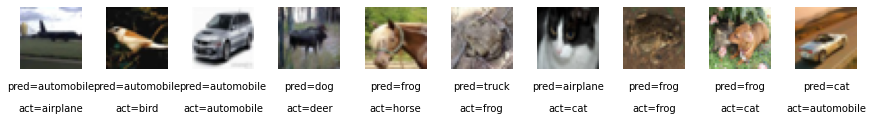

In [7]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred=" + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, "act=" + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(img)